DATA EXPLORATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_recycle=pd.read_csv("WasteManagementAndOverallRecyclingRatesAnnual.csv")
df_recycle.head()

,DataSeries,2024,2023,2022,2021,2020,2019,2018,2017,2016,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Total Generated,6658000,6859000,7385000,6944000,5880000,7278000,7759000,7704000,7814000,...,6114000,5970000,5601000,5221000,5018000,4790000,4728000,4809000,5035000,4643000
1,Construction & Demolition,708000,832000,1424000,1013000,825000,1440000,1624000,1609000,1595000,...,1176000,922000,778000,619000,493000,509000,423000,407000,351000,319000
2,Ferrous Metal,1275000,1296000,1338000,1312000,934000,1278000,1269000,1379000,1358000,...,872000,785000,737000,726000,818000,720000,857000,840000,1115000,989000
3,Non-Ferrous Metal,103000,106000,92000,88000,75000,126000,171000,94000,97000,...,58000,85000,92000,87000,89000,87000,94000,101000,119000,90000
4,Used Slag,112000,176000,169000,182000,106000,174000,246000,273000,251000,...,422000,566000,527000,471000,382000,267000,260000,298000,227000,219000


In [3]:
df_recycle.shape

(60, 26)

In [4]:
df_recycle.dtypes

DataSeries    object
2024          object
2023          object
2022          object
2021           int64
2020           int64
2019           int64
2018           int64
2017           int64
2016           int64
2015           int64
2014           int64
2013           int64
2012           int64
2011           int64
2010           int64
2009           int64
2008           int64
2007           int64
2006           int64
2005           int64
2004           int64
2003           int64
2002           int64
2001           int64
2000           int64
dtype: object

In [5]:
df_recycle.isnull().sum()

DataSeries    0
2024          0
2023          0
2022          0
2021          0
2020          0
2019          0
2018          0
2017          0
2016          0
2015          0
2014          0
2013          0
2012          0
2011          0
2010          0
2009          0
2008          0
2007          0
2006          0
2005          0
2004          0
2003          0
2002          0
2001          0
2000          0
dtype: int64

In [6]:
df_recycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DataSeries  60 non-null     object
 1   2024        60 non-null     object
 2   2023        60 non-null     object
 3   2022        60 non-null     object
 4   2021        60 non-null     int64 
 5   2020        60 non-null     int64 
 6   2019        60 non-null     int64 
 7   2018        60 non-null     int64 
 8   2017        60 non-null     int64 
 9   2016        60 non-null     int64 
 10  2015        60 non-null     int64 
 11  2014        60 non-null     int64 
 12  2013        60 non-null     int64 
 13  2012        60 non-null     int64 
 14  2011        60 non-null     int64 
 15  2010        60 non-null     int64 
 16  2009        60 non-null     int64 
 17  2008        60 non-null     int64 
 18  2007        60 non-null     int64 
 19  2006        60 non-null     int64 
 20  2005        

DATA CLEANING 

In [7]:
df_recycle.columns=df_recycle.columns.astype(str).str.strip()

In [8]:
cols_year = [c for c in df_recycle.columns if c.isdigit()]
print(cols_year[:5], "...", cols_year[-5:])


['2024', '2023', '2022', '2021', '2020'] ... ['2004', '2003', '2002', '2001', '2000']


In [9]:
df_long = df_recycle.melt(
    id_vars=["DataSeries"],
    value_vars=cols_year,
    var_name="Year",
    value_name="Value"
)


  using forward fill to replace the nan values since nan values were found in the last three consecutive are nan in others category we are not able to do interpolation method to replace ,also we prefer forward fill here rather tha mean and median since the data had a sudden fall during the covid year 2020 assuming due  to the lock down which may give differed results we opt for forward fill for the data.


In [10]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["DataSeries"] = df_long["DataSeries"].str.strip()
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")
df_long["Value"] = df_long["Value"].ffill()

In [11]:
df_long = df_long.sort_values(  ["DataSeries", "Year"]).reset_index(drop=True)


In [12]:
print(df_long.head())
print(df_long.info)

       DataSeries  Year    Value
0  Ash And Sludge  2000  50000.0
1  Ash And Sludge  2000      0.0
2  Ash And Sludge  2000  50000.0
3  Ash And Sludge  2000      0.0
4  Ash And Sludge  2001  79000.0
<bound method DataFrame.info of           DataSeries  Year     Value
0     Ash And Sludge  2000   50000.0
1     Ash And Sludge  2000       0.0
2     Ash And Sludge  2000   50000.0
3     Ash And Sludge  2000       0.0
4     Ash And Sludge  2001   79000.0
...              ...   ...       ...
1495            Wood  2023      67.0
1496            Wood  2024  410000.0
1497            Wood  2024  250000.0
1498            Wood  2024  160000.0
1499            Wood  2024      61.0

[1500 rows x 3 columns]>


In [13]:
totals = df_long[
    df_long["DataSeries"].isin([
        "Total Generated",
        "Total Recycled",
        "Total Disposed"
    ])
].copy()


In [14]:
print(totals.groupby(["DataSeries", "Year"]).size().head())


DataSeries      Year
Total Disposed  2000    1
                2001    1
                2002    1
                2003    1
                2004    1
dtype: int64


In [15]:
total_generated = df_long[df_long["DataSeries"] == "Total Generated"]
total_disposed = df_long[df_long["DataSeries"] == "Total Disposed"]

total_recycled = df_long[df_long["DataSeries"] == "Total Recycled"]



DATA VISUALIZATION 

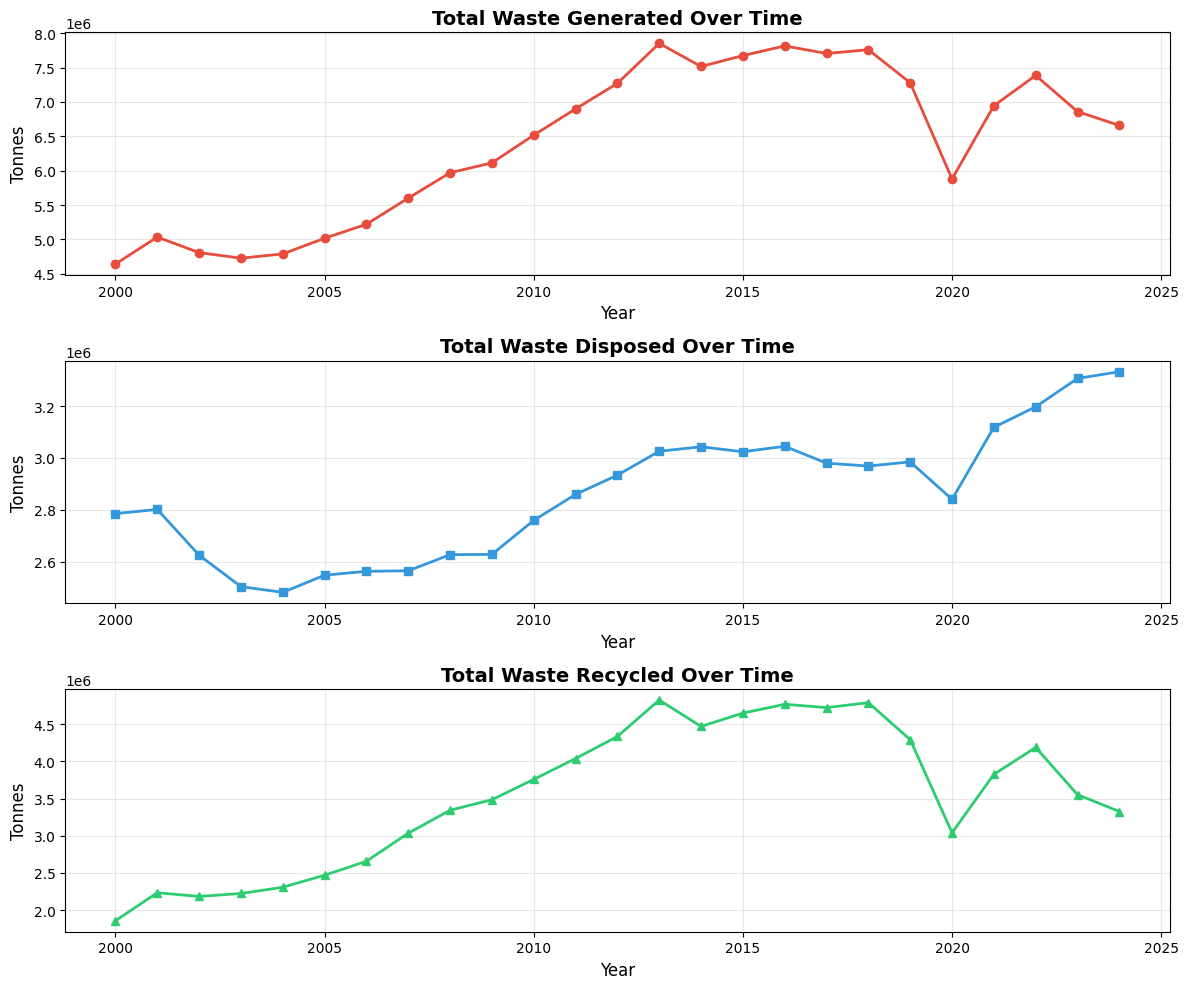

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
# Plot Total Waste Generated
axes[0].plot(total_generated['Year'], total_generated['Value'], marker='o', linewidth=2, markersize=6, color='#e74c3c')
axes[0].set_title('Total Waste Generated Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Tonnes', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Plot Total Waste Disposed
axes[1].plot(total_disposed['Year'], total_disposed['Value'], marker='s', linewidth=2, markersize=6, color='#3498db')
axes[1].set_title('Total Waste Disposed Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Tonnes', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Plot Total Waste Recycled
axes[2].plot(total_recycled['Year'], total_recycled['Value'], marker='^', linewidth=2, markersize=6, color='#2ecc71')
axes[2].set_title('Total Waste Recycled Over Time', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('Tonnes', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('waste_trends.png', dpi=300, bbox_inches='tight')
plt.show()


Stationary test 

In [17]:


def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

is_stationary_gen = adf_test(total_generated["Value"])
is_stationary_dis = adf_test(total_disposed["Value"])
is_stationary_rec = adf_test(total_recycled["Value"])


print(is_stationary_gen)
print(is_stationary_dis)
print(is_stationary_rec)


ADF Statistic: -3.5543902274729384
p-value: 0.0066952993985139025
ADF Statistic: 0.0843246386878188
p-value: 0.9649744243234702
ADF Statistic: -4.783574874952653
p-value: 5.8460343119714417e-05
None
None
None


The ADF test indicated that total waste generated and total recycled series are stationary (p < 0.05), while total waste disposed is non-stationary (p > 0.05). Since wastedisposed is non stationary that is trend is not stable along the mean and variance, first-order differencing was applied uniformly through the ARIMA framework to ensure consistent modeling across all series.

MODEL TRAINING 

In [18]:


def split_train_test(data, test_size=3):
    train = data.iloc[:-test_size]
    test = data.iloc[-test_size:]
    return train, test

def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    }


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

def forecast_target(data, target_name, forecast_years=6):

   
    print(f"FORECASTING: {target_name}")
 

    train, test = split_train_test(data, test_size=3) # chose 3 in order to avoid covid time to over shadow our test data.
    train_vals = train["Value"].values
    test_vals = test["Value"].values

    results = {}
    forecasts = {}

    # weighted moving average- statistical model
    print("\n[1] Weighted Moving Average")

    weights = np.array([0.5, 0.3, 0.2])
    no_weights = len(weights)

    wma_preds = []
    history = train_vals.copy()

    for _ in range(len(test_vals)):
        pred = np.sum(weights * history[-no_weights:])
        wma_preds.append(pred)
        history = np.append(history, pred)

    results["WMA"] = evaluate_model(test_vals, np.array(wma_preds))

    # Future forecast
    future = history[-no_weights:]
    wma_forecast = []
    for _ in range(forecast_years):
        pred = np.sum(weights * future)
        wma_forecast.append(pred)
        future = np.append(future[1:], pred)

    forecasts["WMA"] = wma_forecast

   
    #  Simple Exponential Smoothing - statistical model
    
    print("\n[2] Simple Exponential Smoothing")

    ses_model = ExponentialSmoothing(train_vals, trend=None)
    ses_fit = ses_model.fit()
    ses_preds = ses_fit.forecast(len(test_vals))

    results["SES"] = evaluate_model(test_vals, ses_preds)

    ses_full = ExponentialSmoothing(data["Value"].values, trend=None).fit()
    forecasts["SES"] = ses_full.forecast(forecast_years)

  
    #  Holt-Winters (Trend) -triple exponential smoothing
   
    print("\n[3] Holt-Winters")

    hw_model = ExponentialSmoothing(train_vals, trend="add")
    hw_fit = hw_model.fit()
    hw_preds = hw_fit.forecast(len(test_vals))

    results["Holt-Winters"] = evaluate_model(test_vals, hw_preds)

    hw_full = ExponentialSmoothing(data["Value"].values, trend="add").fit()
    forecasts["Holt-Winters"] = hw_full.forecast(forecast_years)


    #  ARIMA (Baseline)
   
    print("\n[4] ARIMA")
    
    arima_model = ARIMA(train_vals, order=(1, 1, 1))
    arima_fit = arima_model.fit()
    arima_preds = arima_fit.forecast(len(test_vals))

    results["ARIMA"] = evaluate_model(test_vals, arima_preds)

    arima_full = ARIMA(data["Value"].values, order=(1, 1, 1)).fit()
    forecasts["ARIMA"] = arima_full.forecast(forecast_years)

    return results, forecasts, train, test


In [20]:


def visualize_results(data, train, test, forecasts, target_name, years=6):

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(train["Year"], train["Value"], label="Train", marker="o")
    ax.plot(test["Year"], test["Value"], label="Test", marker="o")

    last_year = data["Year"].max()
    future_years = np.arange(last_year + 1, last_year + years + 1)

    for model, values in forecasts.items():
        ax.plot(future_years, values, marker="x", linestyle="--", label=model)

    ax.set_title(f"{target_name} – Model Comparison")
    ax.set_xlabel("Year")
    ax.set_ylabel("Tonnes")
    ax.legend()
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


In waste logistics, a single massive forecasting error is much more disruptive than several tiny, consistent errors.so we are taking rmse values to compare the models which predicts better.RMSE squares the errors before averaging them, which gives disproportionately high weight to large errors.if there is any outliers missed out in the data.

In [21]:
def compare_models(results, target_name):

  
    print(f"MODEL COMPARISON , {target_name}")
    
    print(f"{'Model':<15} {'MAE':>12} {'RMSE':>12} {'MAPE (%)':>12}")
   

    for model, metrics in results.items():
        print(f"{model:<15} {metrics['MAE']:>12,.0f} {metrics['RMSE']:>12,.0f} {metrics['MAPE']:>12.2f}")

    best = min(results.items(), key=lambda x: x[1]["RMSE"])
  
    print(f" BEST MODEL: {best[0]} (Lowest RMSE)")


FORECASTING: Total Waste Generated

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA


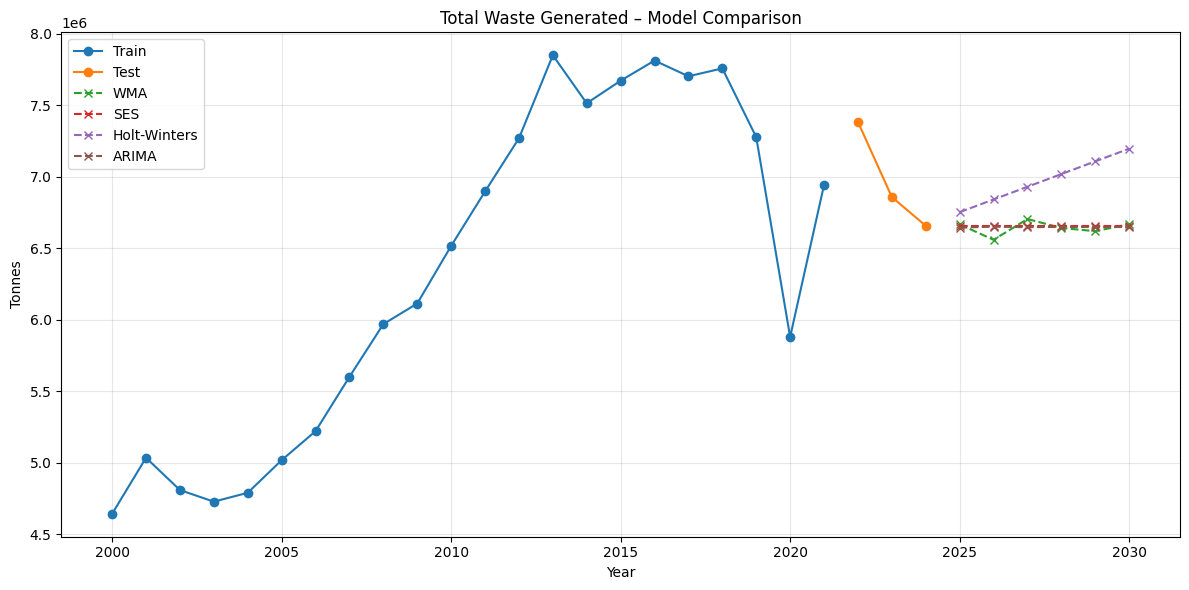

MODEL COMPARISON , Total Waste Generated
Model                    MAE         RMSE     MAPE (%)
WMA                  399,497      445,788         5.64
SES                  250,759      317,576         3.52
Holt-Winters         395,464      415,503         5.71
ARIMA                281,585      297,952         4.05
 BEST MODEL: ARIMA (Lowest RMSE)
FORECASTING: Total Waste Disposed

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA


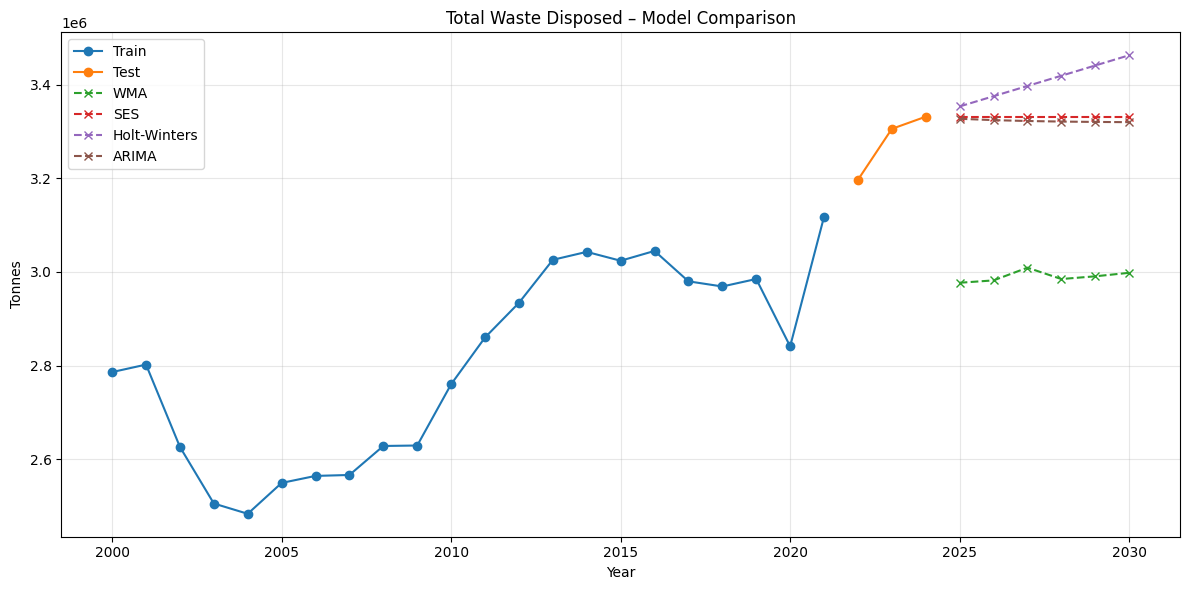

MODEL COMPARISON , Total Waste Disposed
Model                    MAE         RMSE     MAPE (%)
WMA                  292,528      297,146         8.90
SES                  160,333      170,666         4.86
Holt-Winters         122,145      129,863         3.70
ARIMA                168,199      178,785         5.10
 BEST MODEL: Holt-Winters (Lowest RMSE)
FORECASTING: Total Waste Recycled

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA


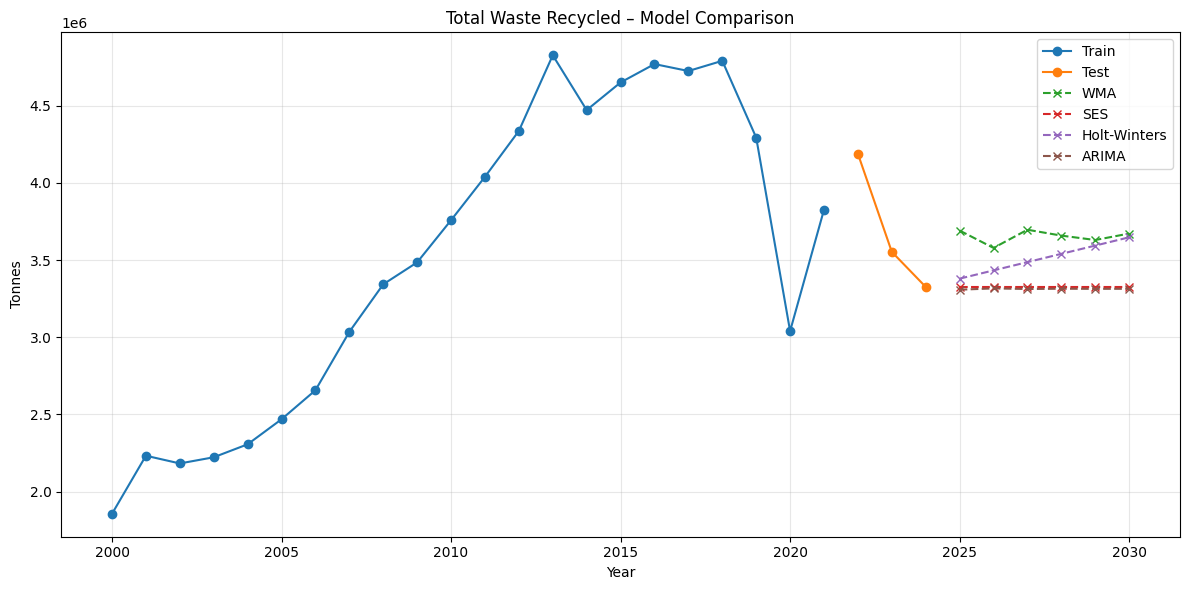

MODEL COMPARISON , Total Waste Recycled
Model                    MAE         RMSE     MAPE (%)
WMA                  301,793      328,707         8.25
SES                  376,676      387,969        10.40
Holt-Winters         839,381      848,728        22.71
ARIMA                398,118      443,331        11.38
 BEST MODEL: WMA (Lowest RMSE)


In [22]:
for data, name in [
    (total_generated, "Total Waste Generated"),
    (total_disposed, "Total Waste Disposed"),
    (total_recycled, "Total Waste Recycled")
]:
    results, forecasts, train, test = forecast_target(data, name)
    visualize_results(data, train, test, forecasts, name)
    compare_models(results, name)


RANDOM FOREST AND XGBOOST   -Feature engineering - transform data to perform random forest and training the model with various hyperparameters to achieve best parameters and validating the results with rmse and mape.

In [23]:
def create_lag_features(df, lags=[1, 2, 3, 4, 5]):
    df_lagged = df.copy()

    for lag in lags:
        df_lagged[f"lag_{lag}"] = df_lagged["Value"].shift(lag)

    df_lagged = df_lagged.dropna().reset_index(drop=True)
    return df_lagged


In [24]:
def prepare_rf(df, lags=[1, 2, 3, 4, 5], test_size=3):
    df_lagged = create_lag_features(df, lags)

    X = df_lagged[[f"lag_{i}" for i in lags]]
    y = df_lagged["Value"]

    X_train, X_test = split_train_test(X, test_size)
    y_train, y_test = split_train_test(y, test_size)

    return X_train, X_test, y_train, y_test, df_lagged


In [25]:
def validate_rf(model, X_test, y_test):
    predictions = model.predict(X_test)
    metrics = evaluate_model(y_test, predictions)
    return metrics, predictions


In [26]:
def rf_forecast(model, last_values, steps=6):
    forecasts = []
    history = list(last_values)

    for _ in range(steps):
        X_input = np.array(history[-len(last_values):]).reshape(1, -1)
        pred = model.predict(X_input)[0]
        forecasts.append(pred)
        history.append(pred)

    return forecasts


In [27]:
def train_model(model_class, params, X_train, y_train):
    model = model_class(**params, random_state=42)
    model.fit(X_train, y_train)
    return model


In [28]:
def tune_model(
    model_class,
    param_grid,
    X_train, X_test,
    y_train, y_test,
    model_name="Model"
):
    best_rmse = np.inf
    best_model = None
    best_params = None
    best_metrics = None

    print(f"\nTuning {model_name}")

    for params in param_grid:
        model = train_model(model_class, params, X_train, y_train)
        preds = model.predict(X_test)

        metrics = evaluate_model(y_test, preds)

        if metrics["RMSE"] < best_rmse:
            best_rmse = metrics["RMSE"]
            best_model = model
            best_params = params
            best_metrics = metrics

    return best_model, best_metrics, best_params


In [29]:
rf_param_grid = [
    {"n_estimators": 200, "max_depth": 3, "min_samples_leaf": 2, "max_features": "sqrt"},
    {"n_estimators": 300, "max_depth": 5, "min_samples_leaf": 2, "max_features": "sqrt"},
    {"n_estimators": 500, "max_depth": 5, "min_samples_leaf": 3, "max_features": "log2"},
    {"n_estimators": 500, "max_depth": 7, "min_samples_leaf": 3, "max_features": "sqrt"},
]


In [30]:
xgb_param_grid = [
    {
        "n_estimators": 200,
        "max_depth": 3,
        "learning_rate": 0.05,
        "subsample": 0.8,
        "colsample_bytree": 0.8
    },
    {
        "n_estimators": 300,
        "max_depth": 3,
        "learning_rate": 0.03,
        "subsample": 0.8,
        "colsample_bytree": 0.8
    },
    {
        "n_estimators": 300,
        "max_depth": 4,
        "learning_rate": 0.05,
        "subsample": 0.9,
        "colsample_bytree": 0.8
    },
    {
        "n_estimators": 500,
        "max_depth": 4,
        "learning_rate": 0.03,
        "subsample": 0.9,
        "colsample_bytree": 0.9
    }
]


In [31]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models_to_run = [
    ("Random Forest", RandomForestRegressor, rf_param_grid),
    ("XGBoost", XGBRegressor, xgb_param_grid)
]

series = [
    ("Total Waste Generated", total_generated),
    ("Total Waste Disposed", total_disposed),
    ("Total Waste Recycled", total_recycled)
]

for name, data in series:
   
    print(f"SERIES: {name}")
   

    # Prepare lagged data
    X_train, X_test, y_train, y_test, df_lagged = prepare_rf(
        data,
        lags=[1, 2, 3, 4, 5],
        test_size=3
    )

    last_known = data["Value"].values[-5:]

    for model_name, model_class, param_grid in models_to_run:
        best_model, best_metrics, best_params = tune_model(
            model_class,
            param_grid,
            X_train, X_test,
            y_train, y_test,
            model_name
        )

        forecast = rf_forecast(best_model, last_known)

        print(f"\n{model_name} BEST PARAMETERS:")
        print(best_params)

        print(f"{model_name} METRICS:")
        print(best_metrics)

        print(f"{model_name} 6-YEAR FORECAST:")
        print(np.round(forecast, 0))


SERIES: Total Waste Generated

Tuning Random Forest

Random Forest BEST PARAMETERS:
{'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}
Random Forest METRICS:
{'MAE': 431520.3383079891, 'RMSE': np.float64(445145.0687849573), 'MAPE': np.float64(6.233461093986046)}
Random Forest 6-YEAR FORECAST:
[7173833. 7268238. 7274798. 7225296. 7234276. 7283732.]

Tuning XGBoost

XGBoost BEST PARAMETERS:
{'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.9}
XGBoost METRICS:
{'MAE': 590454.5, 'RMSE': np.float64(650282.817371347), 'MAPE': np.float64(8.363774028136868)}
XGBoost 6-YEAR FORECAST:
[7.106267e+06 7.442504e+06 7.262518e+06 7.043982e+06 7.238200e+06
 7.441032e+06]
SERIES: Total Waste Disposed

Tuning Random Forest

Random Forest BEST PARAMETERS:
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Random Forest METRICS:
{'MAE': 270625.392857143, 'RMSE': np.float64(275112.212267976

From the above validation results random forest performed better than xgboost while it didnt perform as well as classic time series models.
 This could be  due to the limited size of the annual dataset, the strong  dependency in waste generation trends, and the long-term forecasting years.

PREDICTIONS FROM BEST MODELS 

In [32]:
import pickle

targets = {
    "total_generated": total_generated,
    "total_disposed": total_disposed,
    "total_recycled": total_recycled
}

all_best_forecasts = {}

for name, data in targets.items():

 
    print(f"PROCESSING TARGET: {name}")


    results, forecasts, train, test = forecast_target(
        data,name)
    

    # select best model by RMSE
    best_model = min(results, key=lambda m: results[m]["RMSE"])

    print(f"BEST MODEL for {name}: {best_model}")

    all_best_forecasts[name] = {
        "best_model": best_model,
        "forecast": forecasts[best_model],
        "metrics": results[best_model]
    }


PROCESSING TARGET: total_generated
FORECASTING: total_generated

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA
BEST MODEL for total_generated: ARIMA
PROCESSING TARGET: total_disposed
FORECASTING: total_disposed

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA
BEST MODEL for total_disposed: Holt-Winters
PROCESSING TARGET: total_recycled
FORECASTING: total_recycled

[1] Weighted Moving Average

[2] Simple Exponential Smoothing

[3] Holt-Winters

[4] ARIMA
BEST MODEL for total_recycled: WMA


In [33]:
with open("final_forecasts.pkl", "wb") as f:
    pickle.dump(all_best_forecasts, f)
